In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler


In [2]:
sns.__version__

'0.11.0'

In [3]:
red_wine = pd.read_csv("winequality-red.csv", sep=";")
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
white_wine = pd.read_csv("winequality-white.csv", sep=";")
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [6]:
red_wine["wine_type"] = "red"
white_wine["wine_type"] = "white"

In [7]:
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')

In [8]:
wines = pd.concat([white_wine,red_wine])
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white,medium
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white,medium
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white,medium
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,medium
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red,low
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red,medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red,low


In [9]:
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.25,0.45,2.3,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,7,white,medium
1,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7,white,medium
2,6.2,0.15,0.27,11.0,0.035,46.0,116.0,0.99602,3.12,0.38,9.1,6,white,medium
3,6.7,0.16,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6,white,medium
4,6.8,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5,white,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.3,0.24,0.29,13.7,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,6,white,medium
6493,6.9,0.36,0.25,2.4,0.098,5.0,16.0,0.99640,3.41,0.60,10.1,6,red,medium
6494,13.4,0.27,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,6,red,medium
6495,8.9,0.40,0.51,2.6,0.052,13.0,27.0,0.99500,3.32,0.90,13.4,7,red,medium


In [138]:
des = pd.merge(red_wine.describe(), white_wine.describe(),left_index=True, right_index=True, suffixes=(' R', ' W')).T
des

,count,mean,std,min,25%,50%,75%,max
fixed acidity R,1599.0,8.319637,1.741096,4.60000,7.100000,7.90000,9.200000,15.90000
volatile acidity R,1599.0,0.527821,0.179060,0.12000,0.390000,0.52000,0.640000,1.58000
citric acid R,1599.0,0.270976,0.194801,0.00000,0.090000,0.26000,0.420000,1.00000
residual sugar R,1599.0,2.538806,1.409928,0.90000,1.900000,2.20000,2.600000,15.50000
chlorides R,1599.0,0.087467,0.047065,0.01200,0.070000,0.07900,0.090000,0.61100
free sulfur dioxide R,1599.0,15.874922,10.460157,1.00000,7.000000,14.00000,21.000000,72.00000
total sulfur dioxide R,1599.0,46.467792,32.895324,6.00000,22.000000,38.00000,62.000000,289.00000
density R,1599.0,0.996747,0.001887,0.99007,0.995600,0.99675,0.997835,1.00369
pH R,1599.0,3.311113,0.154386,2.74000,3.210000,3.31000,3.400000,4.01000
sulphates R,1599.0,0.658149,0.169507,0.33000,0.550000,0.62000,0.730000,2.00000


In [139]:
type(des)

pandas.core.frame.DataFrame

In [140]:
des = des.sort_index()
des

,count,mean,std,min,25%,50%,75%,max
alcohol R,1599.0,10.422983,1.065668,8.40000,9.500000,10.20000,11.100000,14.90000
alcohol W,4898.0,10.514267,1.230621,8.00000,9.500000,10.40000,11.400000,14.20000
chlorides R,1599.0,0.087467,0.047065,0.01200,0.070000,0.07900,0.090000,0.61100
chlorides W,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.050000,0.34600
citric acid R,1599.0,0.270976,0.194801,0.00000,0.090000,0.26000,0.420000,1.00000
citric acid W,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.390000,1.66000
density R,1599.0,0.996747,0.001887,0.99007,0.995600,0.99675,0.997835,1.00369
density W,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.996100,1.03898
fixed acidity R,1599.0,8.319637,1.741096,4.60000,7.100000,7.90000,9.200000,15.90000
fixed acidity W,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.300000,14.20000


In [141]:
import matplotlib.pyplot as plt


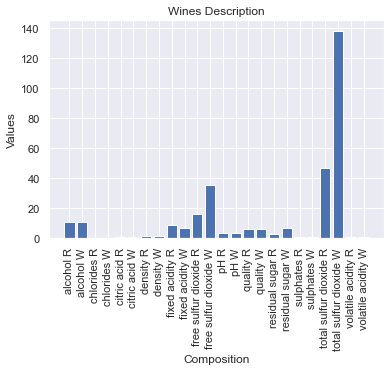

In [142]:
plt.bar(des.index,des['mean'])
plt.xticks(rotation=90) 
plt.xlabel('Composition')
plt.ylabel('Values')
plt.title('Wines Description')
plt.show()

In [144]:
red_wine["total sulfur dioxide"].sum()


74302.0

In [146]:
des_sulfur = des[(des.index=="total sulfur dioxide R") | (des.index=="total sulfur dioxide W")].T
des_sulfur

,total sulfur dioxide R,total sulfur dioxide W
count,1599.000000,4898.000000
mean,46.467792,138.360657
std,32.895324,42.498065
min,6.000000,9.000000
25%,22.000000,108.000000
50%,38.000000,134.000000
75%,62.000000,167.000000
max,289.000000,440.000000


In [148]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.25,0.45,2.3,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,7,white,medium
1,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7,white,medium
2,6.2,0.15,0.27,11.0,0.035,46.0,116.0,0.99602,3.12,0.38,9.1,6,white,medium
3,6.7,0.16,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6,white,medium
4,6.8,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5,white,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.3,0.24,0.29,13.7,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,6,white,medium
6493,6.9,0.36,0.25,2.4,0.098,5.0,16.0,0.99640,3.41,0.60,10.1,6,red,medium
6494,13.4,0.27,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,6,red,medium
6495,8.9,0.40,0.51,2.6,0.052,13.0,27.0,0.99500,3.32,0.90,13.4,7,red,medium


In [150]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


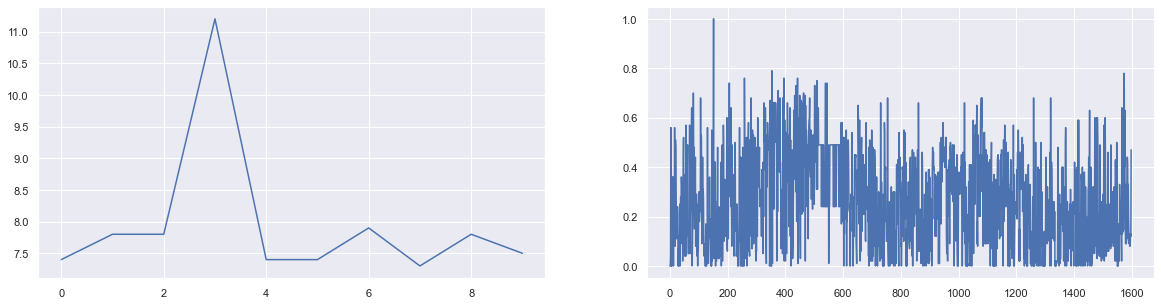

In [152]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5)) 

#manipulating the first Axes 
ax[0].plot(red_wine.index[0:10],red_wine["fixed acidity"][0:10]) 
ax[1].plot(red_wine.index,red_wine["citric acid"]) 


In [154]:
test= red_wine[["quality_label", "density"]]
test

KeyError: "['quality_label'] not in index"

In [156]:
type(red_wine["quality_label"])

pandas.core.series.Series

In [157]:
red_wine["quality_label"]

0          low
1          low
2          low
3       medium
4          low
         ...  
1594       low
1595    medium
1596    medium
1597       low
1598    medium
Name: quality_label, Length: 1599, dtype: object

In [158]:
q_data= red_wine["quality_label"].value_counts()
q_data

medium    837
low       744
high       18
Name: quality_label, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

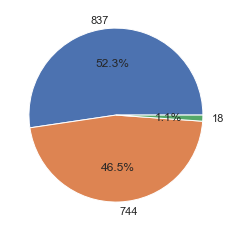

In [159]:
plt.pie(q_data,labels=q_data,autopct='%1.1f%%')
plt.show

In [160]:
red_alc = red_wine[["alcohol","quality_label"]]
red_alc

,alcohol,quality_label
0,9.4,low
1,9.8,low
2,9.8,low
3,9.8,medium
4,9.4,low
...,...,...
1594,10.5,low
1595,11.2,medium
1596,11.0,medium
1597,10.2,low


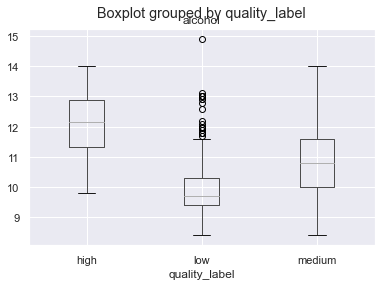

In [161]:
red_alc.boxplot(column=["alcohol"], by= "quality_label",)

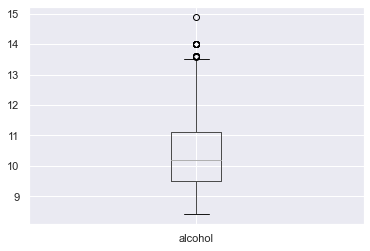

In [162]:
#np.random.seed(1234)
#df = pd.DataFrame(np.random.randn(10, 4),
                  #columns=['Col1', 'Col2', 'Col3', 'Col4'])
boxplot = red_alc.boxplot("alcohol")

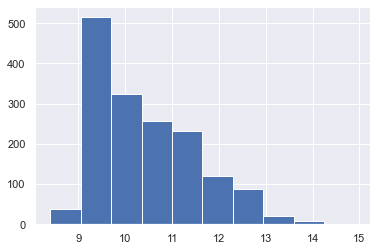

In [163]:
plt.hist(red_alc["alcohol"], bins=10)
plt.show()

In [164]:
#how to get low medium high displayed?
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.25,0.45,2.3,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,7,white,medium
1,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7,white,medium
2,6.2,0.15,0.27,11.0,0.035,46.0,116.0,0.99602,3.12,0.38,9.1,6,white,medium
3,6.7,0.16,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6,white,medium
4,6.8,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5,white,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.3,0.24,0.29,13.7,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,6,white,medium
6493,6.9,0.36,0.25,2.4,0.098,5.0,16.0,0.99640,3.41,0.60,10.1,6,red,medium
6494,13.4,0.27,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,6,red,medium
6495,8.9,0.40,0.51,2.6,0.052,13.0,27.0,0.99500,3.32,0.90,13.4,7,red,medium


In [165]:
# Apply the default theme
sns.set_theme()
# Load an example dataset
#tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=wines,
    x=wines.index, y="alcohol",
    hue="wyne_type", col="quality", alpha=0.5)

ValueError: Could not interpret value `wyne_type` for parameter `hue`

In [26]:
wines.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wyne_type                object
quality_label            object
wine_type                object
dtype: object

In [107]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.25,0.45,2.3,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,7,white,medium
1,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7,white,medium
2,6.2,0.15,0.27,11.0,0.035,46.0,116.0,0.99602,3.12,0.38,9.1,6,white,medium
3,6.7,0.16,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6,white,medium
4,6.8,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5,white,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.3,0.24,0.29,13.7,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,6,white,medium
6493,6.9,0.36,0.25,2.4,0.098,5.0,16.0,0.99640,3.41,0.60,10.1,6,red,medium
6494,13.4,0.27,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,6,red,medium
6495,8.9,0.40,0.51,2.6,0.052,13.0,27.0,0.99500,3.32,0.90,13.4,7,red,medium


In [113]:
wines.drop(columns=["citric acid","chlorides","free sulfur dioxide","alcohol","quality","quality_label"]).corr()
wines

KeyError: "['citric acid' 'chlorides' 'free sulfur dioxide' 'alcohol' 'quality'\n 'quality_label'] not found in axis"

In [114]:
A = pd.get_dummies(wines) 
A

,fixed acidity,volatile acidity,residual sugar,total sulfur dioxide,density,pH,sulphates,wine_type_red,wine_type_white
0,7.0,0.25,2.3,118.0,0.99064,3.16,0.48,0,1
1,7.6,0.14,1.6,103.0,0.99160,3.07,0.40,0,1
2,6.2,0.15,11.0,116.0,0.99602,3.12,0.38,0,1
3,6.7,0.16,12.5,156.0,0.99666,2.88,0.36,0,1
4,6.8,0.27,17.8,116.0,0.99890,3.07,0.53,0,1
...,...,...,...,...,...,...,...,...,...
6492,6.3,0.24,13.7,134.0,0.99567,3.17,0.38,0,1
6493,6.9,0.36,2.4,16.0,0.99640,3.41,0.60,1,0
6494,13.4,0.27,2.6,21.0,1.00020,3.16,0.67,1,0
6495,8.9,0.40,2.6,27.0,0.99500,3.32,0.90,1,0


In [115]:
A.corr()["wine_type_red"]

fixed acidity           0.486740
volatile acidity        0.653036
residual sugar         -0.348821
total sulfur dioxide   -0.700357
density                 0.390645
pH                      0.329129
sulphates               0.487218
wine_type_red           1.000000
wine_type_white        -1.000000
Name: wine_type_red, dtype: float64

In [116]:
A.corr()["wine_type_white"]

fixed acidity          -0.486740
volatile acidity       -0.653036
residual sugar          0.348821
total sulfur dioxide    0.700357
density                -0.390645
pH                     -0.329129
sulphates              -0.487218
wine_type_red          -1.000000
wine_type_white         1.000000
Name: wine_type_white, dtype: float64

In [176]:
mask = np.triu(np.ones_like(wines.corr(), dtype=bool))
plt.figure(figsize=(10,10))
plot=sns.heatmap(A.corr(), annot=True, mask=mask)

ValueError: Mask must have the same shape as data.

In [122]:
X= wines.drop(columns=["wine_type"])
y= wines["wine_type"]

In [123]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [124]:
X_test.shape

(1300, 7)

In [125]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [126]:
lr.predict(X_test)

array(['white', 'red', 'white', ..., 'white', 'white', 'white'],
      dtype=object)

In [127]:
y_test

3103    white
1419      red
4761    white
4690    white
4032    white
        ...  
889     white
2850    white
4917    white
5198    white
5643    white
Name: wine_type, Length: 1300, dtype: object

In [128]:
score = lr.score(X_test, y_test)
print('Test Accuracy Score', score)

Test Accuracy Score 0.97
